## Sistema de Recomendação de veículos usando
### Daniel Pereira da Silva

In [21]:
# importando libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
# ler a base de dados (base gerada para fins academicos)
df_veiculos = pd.read_csv('/content/base_veiculos.csv',sep=';',encoding='utf-8')

In [23]:
# visualizar parte do dataframe
df_veiculos.head()

,nome_veiculo,preco,potencia_cv,consumo_cidade,tipo_suv,tipo_sedan,cambio_automatica,combustivel_flex,ano
0,Fiat Strada Endurance,86033,109,12.0,0,0,0,1,2024
1,Fiat Strada Freedom,99598,109,12.0,0,0,0,1,2024
2,Chevrolet Onix Plus LT,75000,82,13.9,0,1,0,1,2024
3,Chevrolet Onix Plus Premier,82000,82,13.9,0,1,1,1,2024
4,Volkswagen Polo MSI,68000,82,14.2,0,0,0,1,2024


In [24]:
# visualizar tipo do dado em cada tabela
df_veiculos.dtypes

,0
nome_veiculo,object
preco,int64
potencia_cv,int64
consumo_cidade,float64
tipo_suv,int64
tipo_sedan,int64
cambio_automatica,int64
combustivel_flex,int64
ano,int64


In [25]:
# selecionar as colunas que nao sao texto ou object para padronizar os dados
colunas_numericas = ['preco', 'potencia_cv', 'consumo_cidade', 'tipo_suv',
                    'tipo_sedan', 'cambio_automatica', 'combustivel_flex', 'ano']

df_numerico = df_veiculos[colunas_numericas]

# standardScaler
scaler = StandardScaler()
produtos_escalonados = scaler.fit_transform(df_numerico)

In [26]:
# método do cotovelo (metodo serve para encontrar a quantidade ideal de clusters)
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(produtos_escalonados)
    wcss.append(kmeans.inertia_)

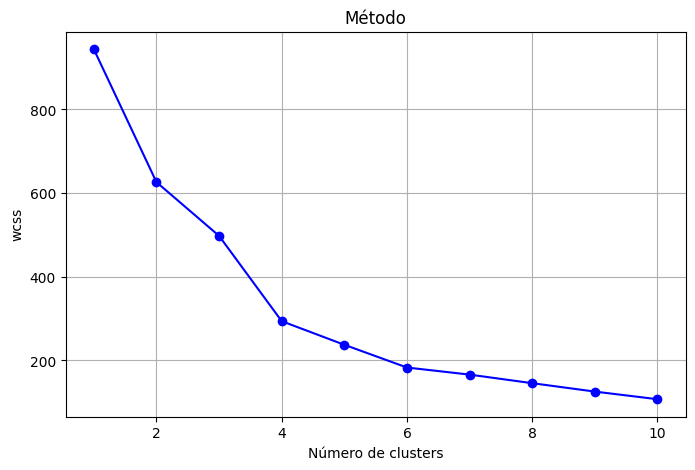

In [27]:
# gráfico de cotovelo (visualizar os resultados, busque sempre encontrar o 'cotovelo' da curva)
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('wcss')
plt.title('Método')
plt.grid()
plt.show()

In [28]:
# escolhendo quantidade de clusters e aplicando
k_escolhido = 4
kmeans_final = KMeans(n_clusters=k_escolhido, random_state=42, verbose=1)
df_veiculos['Cluster'] = kmeans_final.fit_predict(produtos_escalonados)

Initialization complete
Iteration 0, inertia 402.7647111314098.
Iteration 1, inertia 301.5267178404254.
Iteration 2, inertia 293.8526076488539.
Converged at iteration 2: strict convergence.


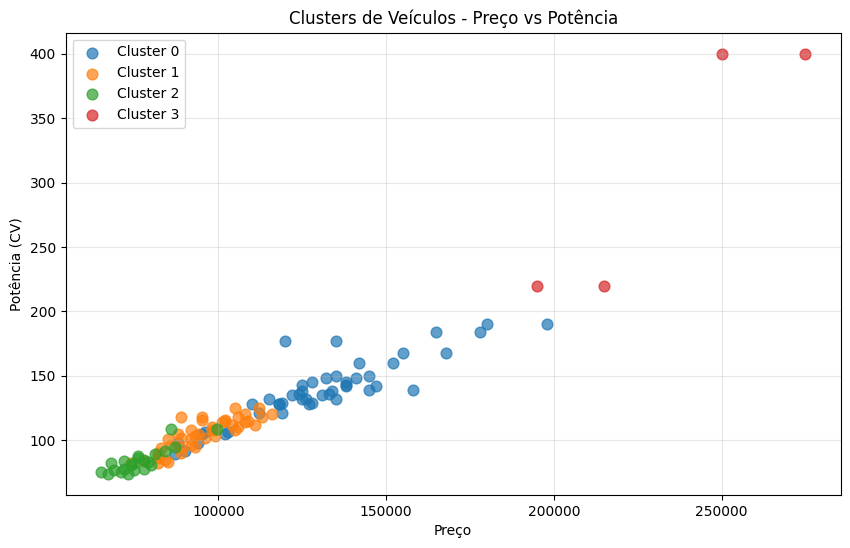

In [29]:
# visualizar os clusters por algumas dimensoes
plt.figure(figsize=(10, 6))
for cluster in range(k_escolhido):
    cluster_data = df_veiculos[df_veiculos['Cluster'] == cluster]
    plt.scatter(cluster_data['preco'], cluster_data['potencia_cv'],
                label=f'Cluster {cluster}', alpha=0.7, s=60)

plt.xlabel('Preço')
plt.ylabel('Potência (CV)')
plt.title('Clusters de Veículos - Preço vs Potência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

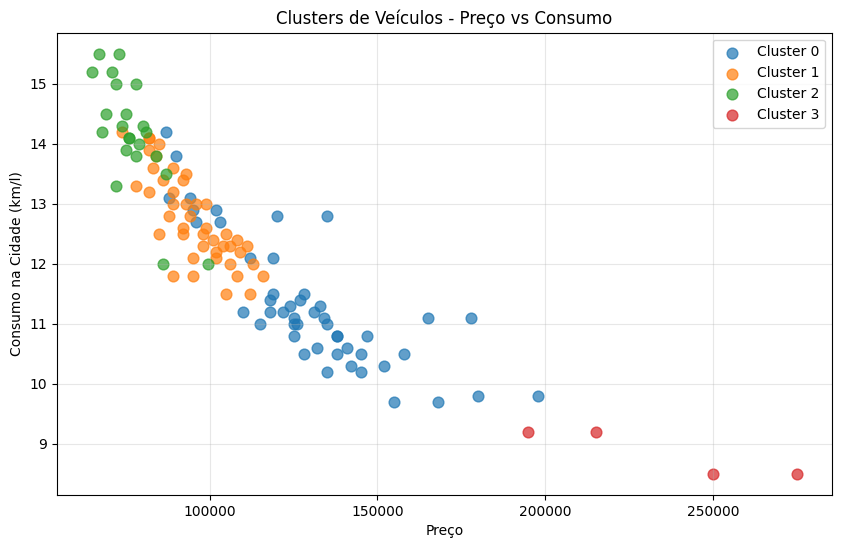

In [30]:
plt.figure(figsize=(10, 6))
for cluster in range(k_escolhido):
    cluster_data = df_veiculos[df_veiculos['Cluster'] == cluster]
    plt.scatter(cluster_data['preco'], cluster_data['consumo_cidade'],
                label=f'Cluster {cluster}', alpha=0.7, s=60)

plt.xlabel('Preço')
plt.ylabel('Consumo na Cidade (km/l)')
plt.title('Clusters de Veículos - Preço vs Consumo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

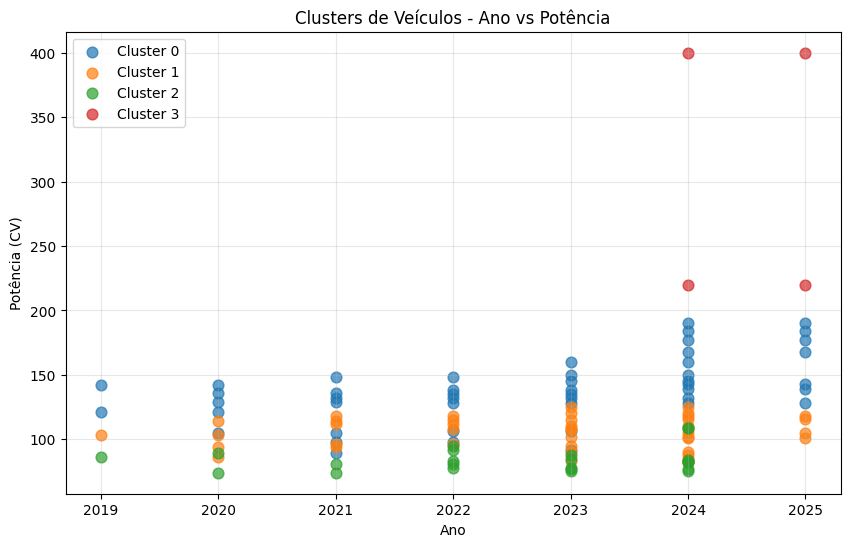

In [31]:
plt.figure(figsize=(10, 6))
for cluster in range(k_escolhido):
    cluster_data = df_veiculos[df_veiculos['Cluster'] == cluster]
    plt.scatter(cluster_data['ano'], cluster_data['potencia_cv'],
                label=f'Cluster {cluster}', alpha=0.7, s=60)

plt.xlabel('Ano')
plt.ylabel('Potência (CV)')
plt.title('Clusters de Veículos - Ano vs Potência')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [37]:
# perguntas para o usuário
preco_maximo = float(input("Digite o preço máximo desejado (R$): "))
potencia_minima = float(input("Digite a potência mínima desejada (CV): "))
consumo_maximo = float(input("Digite o consumo minimo desejado na cidade (km/l): "))
ano_minimo = int(input("Digite o ano mínimo do veículo: "))

#preferencias booleanas
prefere_suv = input("Prefere SUV? (s/n): ").lower() == 's'
prefere_sedan = input("Prefere Sedan? (s/n): ").lower() == 's'
prefere_automatico = input("Prefere câmbio automático? (s/n): ").lower() == 's'
prefere_flex = input("Prefere combustível flex? (s/n): ").lower() == 's'

Digite o preço máximo desejado (R$): 95000
Digite a potência mínima desejada (CV): 110
Digite o consumo minimo desejado na cidade (km/l): 10
Digite o ano mínimo do veículo: 2022
Prefere SUV? (s/n): s
Prefere Sedan? (s/n): n
Prefere câmbio automático? (s/n): s
Prefere combustível flex? (s/n): s


In [38]:
# transformar entrada do usuário usando o mesmo metodo scaler
entrada_usuario = scaler.transform([[preco_maximo, potencia_minima, consumo_maximo,
                                   int(prefere_suv), int(prefere_sedan),
                                   int(prefere_automatico), int(prefere_flex), ano_minimo]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
# realizar a previsão correspondente ao cluster
cluster_usuario = kmeans_final.predict(entrada_usuario)[0]

In [40]:
# filtrar veículos do mesmo cluster que atendem os requisitos do usuario
veiculos_recomendados = df_veiculos[
    (df_veiculos['Cluster'] == cluster_usuario) &
    (df_veiculos['preco'] <= preco_maximo) &
    (df_veiculos['consumo_cidade'] >= consumo_maximo) &
    (df_veiculos['potencia_cv'] >= potencia_minima) &
    (df_veiculos['ano'] >= ano_minimo) &
    (df_veiculos['tipo_suv'] == int(prefere_suv)) &
    (df_veiculos['tipo_sedan'] == int(prefere_sedan)) &
    (df_veiculos['cambio_automatica'] == int(prefere_automatico)) &
    (df_veiculos['combustivel_flex'] == int(prefere_flex))
]
# filtro mais flexivel, caso o df venha sem nenhuma recomendação
if veiculos_recomendados.empty:
    veiculos_recomendados = df_veiculos[
        (df_veiculos['Cluster'] == cluster_usuario) &
        (df_veiculos['preco'] <= preco_maximo * 1.2) & # 20% mais caro
        (df_veiculos['consumo_cidade'] >= consumo_maximo * 0.8) & # 20% menos econômico
        (df_veiculos['potencia_cv'] >= potencia_minima * 0.8) & # 20% menos potentes
        (df_veiculos['ano'] >= ano_minimo - 1) # 1 ano mais antigo
    ]

In [41]:
# exibindo recomendações
if not veiculos_recomendados.empty:
   print(veiculos_recomendados[['nome_veiculo', 'preco', 'potencia_cv', 'consumo_cidade', 'ano']])
else:
   print("Nenhum veículo encontrado. Ajuste sua os requisitos e tente novamente.")

               nome_veiculo   preco  potencia_cv  consumo_cidade   ano
18   Nissan Kicks Exclusive  110000          128            11.2  2024
66         Ford EcoSport SE   96000          106            12.7  2022
67   Ford EcoSport Titanium  103000          106            12.7  2023
73        Chery Tiggo 2 Act   90000           92            13.8  2023
78      Peugeot 2008 Active   88000           98            13.1  2021
79      Peugeot 2008 Griffe   94000           98            13.1  2022
99   Jeep Compass Longitude   87000           89            14.2  2021
101         Toyota RAV4 TOP  102000          105            12.9  2021
